<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/50EyoloM_Avance4_26Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

# Librerías
import os
import random
import shutil

# Definir carpetas base
carpeta_base = '/content/drive/MyDrive'
carpeta_imagenes = os.path.join(carpeta_base, 'Labels')
carpeta_etiquetas = os.path.join(carpeta_base, 'train')

# Crear estructura de dataset para YOLO
yolo_path = '/content/yolo_dataset'
for split in ['train', 'val']:
    os.makedirs(os.path.join(yolo_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(yolo_path, 'labels', split), exist_ok=True)

# Listar imágenes y etiquetas
imagenes = sorted([f for f in os.listdir(carpeta_imagenes) if f.lower().endswith(('.jpg', '.png','.JPG'))])
etiquetas = sorted([f for f in os.listdir(carpeta_etiquetas) if f.endswith('.txt')])

# Emparejar imágenes con sus etiquetas
pares = [(img, img.rsplit('.', 1)[0] + '.txt') for img in imagenes if img.rsplit('.', 1)[0] + '.txt' in etiquetas]
random.shuffle(pares)

# Dividir en 80% train y 20% val
split_idx = int(0.8 * len(pares))
train_pares = pares[:split_idx]
val_pares = pares[split_idx:]

# Función para copiar archivos
def copiar_pares(pares, tipo):
    for img_file, label_file in pares:
        shutil.copy(os.path.join(carpeta_imagenes, img_file), os.path.join(yolo_path, 'images', tipo, img_file))
        shutil.copy(os.path.join(carpeta_etiquetas, label_file), os.path.join(yolo_path, 'labels', tipo, label_file))

copiar_pares(train_pares, 'train')
copiar_pares(val_pares, 'val')

# Crear archivo de configuración YAML
yaml_content = f"""
path: {yolo_path}
train: images/train
val: images/val
nc: 1
names: ['etiqueta']
"""

with open('/content/yolo_dataset/dataset.yaml', 'w') as f:
    f.write(yaml_content)

Mounted at /content/drive


In [2]:
!pip install ultralytics
from ultralytics import YOLO

# Entrenar modelo base nano
model = YOLO('yolov8m.pt')  # También puedes probar yolov8s.pt, yolov8m.pt, etc.
model.train(data='/content/yolo_dataset/dataset.yaml', epochs=50, imgsz=416,cache=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

100%|██████████| 49.7M/49.7M [00:01<00:00, 33.7MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192,

100%|██████████| 5.35M/5.35M [00:00<00:00, 404MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 204.2±9.3 MB/s, size: 2250.2 KB)


train: Scanning /content/yolo_dataset/labels/train... 236 images, 27 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<00:00, 391.08it/s]


train: New cache created: /content/yolo_dataset/labels/train.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 236/236 [00:27<00:00,  8.70it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 125.4±39.6 MB/s, size: 1655.0 KB)


val: Scanning /content/yolo_dataset/labels/val... 60 images, 8 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 367.20it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 60/60 [00:06<00:00,  9.83it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.85G      1.221      2.046      1.392         63        416: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         60         82      0.665      0.793      0.748      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.64G     0.7527     0.7895       1.05         38        416: 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         60         82      0.607      0.634      0.691      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.71G      0.773     0.7815      1.067         42        416: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         60         82     0.0323      0.268     0.0288     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.77G     0.8202     0.8619      1.091         39        416: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         60         82     0.0142      0.134    0.00771    0.00522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.84G      0.858     0.7891      1.107         35        416: 100%|██████████| 15/15 [00:04<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         60         82       0.76      0.232      0.324       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.91G     0.8851     0.8278      1.131         45        416: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         60         82      0.064      0.354     0.0449     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.16G     0.8666       0.82      1.128         43        416: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         60         82    0.00249      0.317    0.00151    0.00075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.23G     0.8916      0.723      1.116         52        416: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         60         82    0.00444     0.0122     0.0014   0.000642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.3G     0.8238      0.732       1.07         43        416: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         60         82     0.0724     0.0976     0.0401      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.36G     0.7703     0.6433      1.054         34        416: 100%|██████████| 15/15 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         60         82       0.44      0.488      0.376      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.62G     0.7506     0.6165      1.054         39        416: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         60         82      0.653      0.619      0.607      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.69G     0.7802     0.6236      1.063         39        416: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         60         82      0.592      0.622       0.59      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.75G     0.7723     0.5894      1.083         36        416: 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         60         82      0.474      0.561      0.415       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.95G     0.7582     0.5866      1.052         46        416: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         60         82      0.773      0.829      0.831      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.01G     0.7745     0.5911      1.073         40        416: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         60         82      0.795      0.841      0.862      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.09G     0.6909     0.5472      1.021         37        416: 100%|██████████| 15/15 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         60         82       0.81      0.915      0.886       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.24G     0.7089     0.6005      1.024         30        416: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         60         82      0.763      0.817      0.815      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.38G     0.6867     0.5748      1.029         42        416: 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         60         82      0.792      0.836       0.86      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.8G     0.6995     0.5616      1.016         26        416: 100%|██████████| 15/15 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         60         82      0.858      0.939      0.921      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.88G     0.7021     0.5454      1.028         29        416: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         60         82      0.873      0.951      0.928      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.94G     0.6667     0.5131      1.001         31        416: 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         60         82      0.906      0.936      0.938      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.01G     0.6676     0.4974     0.9968         38        416: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         60         82      0.902      0.895      0.921       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.13G     0.6462     0.5046      1.006         41        416: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         60         82      0.891      0.927      0.906      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.28G     0.6369     0.5058     0.9795         37        416: 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         60         82       0.89      0.893      0.944      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.44G     0.6262     0.5114     0.9891         45        416: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         60         82      0.833      0.854      0.881      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.86G     0.6423     0.5079      1.006         39        416: 100%|██████████| 15/15 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         60         82      0.837      0.942      0.939      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.93G     0.6175     0.4782     0.9871         30        416: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         60         82      0.876      0.866      0.883      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         7G     0.6119     0.4561     0.9773         40        416: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         60         82      0.909      0.902      0.925       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.06G      0.622     0.4499     0.9679         41        416: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         60         82      0.904      0.927      0.918      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.32G      0.602     0.4535     0.9763         36        416: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         60         82      0.894      0.963       0.95      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.38G     0.5922     0.4463     0.9667         37        416: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         60         82      0.883      0.951      0.923      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.41G     0.6052      0.439     0.9703         40        416: 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         60         82      0.879      0.975      0.931      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.41G     0.5895     0.4366     0.9682         39        416: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         60         82      0.889      0.976       0.93      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.41G     0.5812     0.4493     0.9761         34        416: 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         60         82      0.867      0.976      0.938      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.41G     0.5718     0.3943     0.9643         44        416: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         60         82      0.886      0.944      0.941      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.47G     0.5264     0.3766     0.9485         39        416: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         60         82      0.876      0.951      0.926      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.56G     0.5376     0.4082      0.962         30        416: 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         60         82      0.895      0.951      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.82G      0.542     0.4039     0.9528         47        416: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         60         82      0.899      0.951      0.941      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.05G     0.5558     0.3963     0.9528         42        416: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         60         82      0.886      0.951      0.918      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.12G     0.5012     0.3898      0.954         40        416: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         60         82      0.877      0.976      0.936      0.825


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.19G     0.4615     0.3592     0.9355         13        416: 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         60         82      0.889      0.973      0.947      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.33G     0.4713     0.3381     0.9554         23        416: 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         60         82      0.898       0.97      0.956      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.75G     0.4698       0.34     0.9345         29        416: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         60         82      0.924      0.939      0.959      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.82G     0.4701     0.3232     0.9475         15        416: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         60         82      0.917      0.951      0.959      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.88G     0.4707     0.3404      0.928         16        416: 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         60         82      0.914      0.951       0.95      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.95G     0.4435     0.3165     0.9195         30        416: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         60         82      0.908      0.939      0.946      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.21G     0.4659     0.3177     0.9297         12        416: 100%|██████████| 15/15 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         60         82       0.91      0.963      0.946      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.28G     0.4451     0.3064     0.9346         23        416: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         60         82      0.918       0.96      0.943      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.37G     0.4335     0.2942     0.9024         21        416: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         60         82      0.906      0.963      0.945      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.52G     0.4209     0.3021     0.9086         30        416: 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         60         82      0.904      0.963      0.946       0.83



50 epochs completed in 0.073 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


                   all         60         82      0.898       0.97      0.956      0.848
Speed: 0.1ms preprocess, 4.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f20a1bdc7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [3]:
metrics = model.val()

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 2016.0±1238.0 MB/s, size: 2259.8 KB)


val: Scanning /content/yolo_dataset/labels/val.cache... 60 images, 8 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 60/60 [00:07<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]


                   all         60         82      0.909      0.973      0.956      0.849
Speed: 3.8ms preprocess, 13.1ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train2


In [4]:
# Ruta donde quieres guardar tus resultados
ruta_resultados = '/content/drive/MyDrive/YOLOv8M_50Eresultados'

# Crear carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

# Copiar pesos entrenados
shutil.copytree('runs/detect', os.path.join(ruta_resultados, 'train3'), dirs_exist_ok=True)

# Copiar predicciones (opcional)
shutil.copytree('runs/detect', os.path.join(ruta_resultados, 'predict'), dirs_exist_ok=True)

'/content/drive/MyDrive/YOLOv8M_50Eresultados/predict'

In [5]:
# Cargar modelo entrenado
model = YOLO('runs/detect/train/weights/best.pt')

# Ruta a tus nuevas imágenes
carpeta_nuevas = '/content/drive/MyDrive/nuevas_imagenes'

# Ejecutar predicciones
results = model.predict(source=carpeta_nuevas, save=True, conf=0.25)

# Las imágenes anotadas se guardan automáticamente en:
# runs/detect/predict


image 1/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6183.JPG: 416x320 11 etiquetas, 46.0ms
image 2/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6184.JPG: 416x320 1 etiqueta, 20.2ms
image 3/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6185.JPG: 416x320 2 etiquetas, 20.2ms
image 4/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6186.JPG: 416x320 8 etiquetas, 20.3ms
image 5/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6187.JPG: 416x320 2 etiquetas, 20.2ms
image 6/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6188.JPG: 416x320 2 etiquetas, 20.2ms
image 7/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6189.JPG: 416x320 6 etiquetas, 20.3ms
image 8/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6190.JPG: 416x320 1 etiqueta, 20.2ms
image 9/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6191.JPG: 416x320 3 etiquetas, 20.2ms
image 10/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6192.JPG: 416x320 2 etiquetas, 20.2ms
image 11/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6193.JPG: 416x320 1 etiq

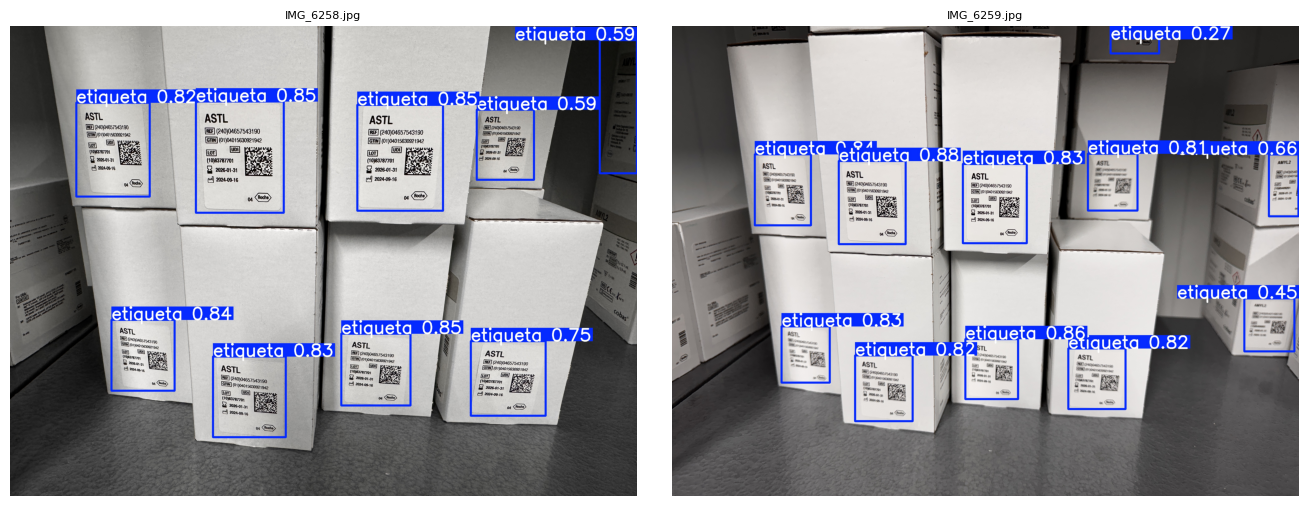

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Ruta donde se guardaron las imágenes predichas
carpeta_resultados = 'runs/detect/predict'
imagenes = sorted([f for f in os.listdir(carpeta_resultados) if f.endswith(('.jpg', '.png'))])[75:77]  # Solo 10 primeras

# Parámetros de visualización
imagenes_por_fila = 3
total_imagenes = len(imagenes)
filas = (total_imagenes + imagenes_por_fila - 1) // imagenes_por_fila

plt.figure(figsize=(20, 5 * filas))

for i, nombre in enumerate(imagenes):
    ruta = os.path.join(carpeta_resultados, nombre)
    img = mpimg.imread(ruta)
    plt.subplot(filas, imagenes_por_fila, i + 1)
    plt.imshow(img)
    plt.title(nombre, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()